# IDS 576 Team 4 Intermediate Code Report
Our Multi-Agent Reinforcement Learning (MARL) simulation is comprised of multiple parts and in order to matain the highest degree of control we have decided to build our simulation environment from the ground up. 

If you are interested in further details regarding our source code please see the Team 4's project repo: https://github.com/Team4IDS576/class-project/tree/main

## Simulation Environment
In order to run our MARL traffic assignment simulation we have created the following `edge`, `node`, and `roadnet` classes that we can use to represent real-world transportation networks.

In [1]:
import sys

sys.path.append("../simulation")

from network import edge, node, roadnet

The first class is the `edge` class, which is used to represent road segments of the network. An instance of this class is instatied with an integer `id`, tuple coordinates representing the vertices `v1` and `v2` of the segment, and a `speed_limit`. The `info()` method returns a list of attributes related to the segment and the class interally stores data related to the geospatial properties.

 This class will be improved in the future to contain instance variables related to network traffic and agents along the segment during the simulation.

In [2]:
example_edge = edge(0, (0,0), (10,10), 45)
example_edge2 = edge(1, (10,0), (0,0), 30)

print("id, length, angle_degrees, speed_limit")
print(example_edge.info())
print(example_edge2.info())

id, length, angle_degrees, speed_limit
[0, 14.142135623730951, 45.0, 45]
[1, 10.0, -90.0, 30]


The `node` class was constructed to represent intersections in network. When an agent reaches a `node` they will be tasked with deciding which `edge` segment to take to reach their destination.

The class is instantiated with only an `id` and `location` tuple, and interfaces with `edge` objects to store the relational attributes of the network. Note that the `add_edge()` method will only add an `edge` object that shares a vertex with the `node`.

The `summary()` is used debugging purposes to verify that road segments have been succesfully connected to an intersection.

In [3]:
example_node = node(0, (0,0))

example_node.add_edge(example_edge)
example_node.add_edge(example_edge2)

example_node.summary()

Node id: 0
Connected Edges:
edge id: 0	Vertex: v1
edge id: 1	Vertex: v2


The main class `roadnet()` is the main component of the simulation enviornment, and is used to construct the final transportation network for simulation. The utility methods `add_edges()` and `add_nodes` are used to load the input classes in bulk for effecient network building that can be easily integrated with external data sources such as Geographic Information Systems (GIS) dBASE tables. Following instatiation and and the addition of `node` and `edge` objects the `build` methods connects the network.

In [4]:
roads = [
    edge(0, (0,0), (0,10)),
    edge(1, (0,10), (10,10)),
    edge(2, (10,10), (10, 0)),
    edge(3, (10, 0), (0,0))
]

intersections = [
    node(0, (0,0)),
    node(1, (0,10)),
    node(2, (10, 0)),
    node(3, (10,10))
]

test_net = roadnet()
test_net.add_edges(roads)
test_net.add_nodes(intersections)
test_net.build()

The following methods returns metrics about the completed `roadnet()` object and the debugging tool `wireframe()` allows us to easily visualize the network and check for missing items and errors in the construction process.

id	start_x	start_y	end_x	end_y	length
0	0	0	0	10	10.0
1	0	10	10	10	10.0
2	10	10	10	0	10.0
3	10	0	0	0	10.0
node id	location	connected_edges
0	(0, 0)	2
1	(0, 10)	2
2	(10, 0)	2
3	(10, 10)	2


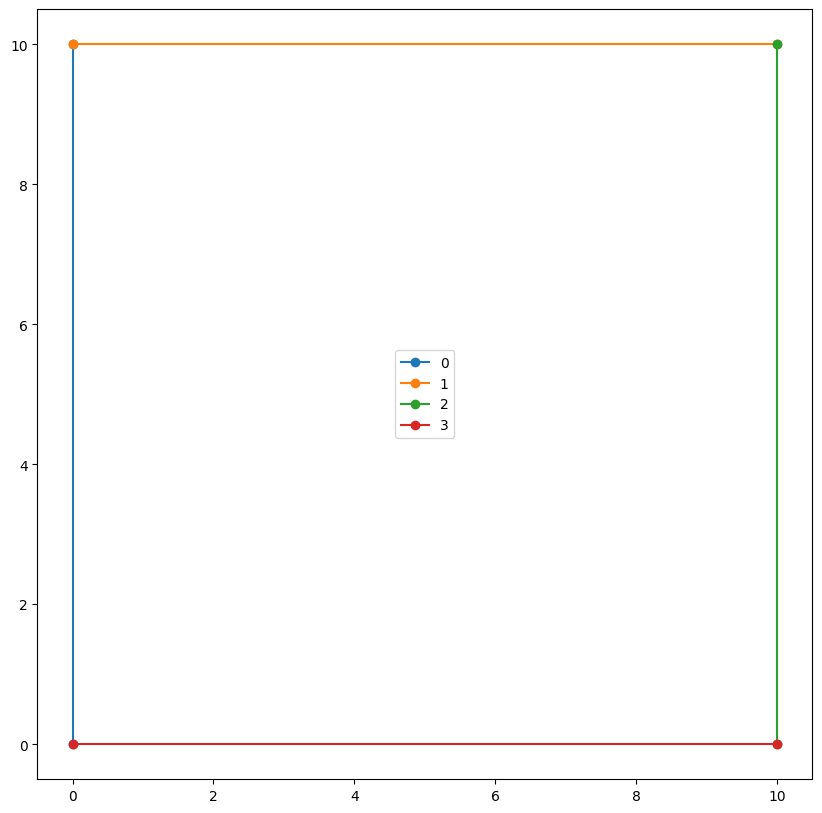

In [7]:
test_net.edge_states_summary()
test_net.node_states_summary()
test_net.wireframe()